In [71]:
import tensorflow
import matplotlib
import seaborn 
import numpy 
import pandas
import sklearn

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)


2.6.0
3.4.3
0.11.2
1.21.4
1.3.3
1.0


In [72]:
# 텐서플로 데이터셋에서 다운로드하기
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [74]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [76]:
# 모든 단어 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

#test데이터도 변환해주세요!
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
8982
2246
(8982, 26506)
(8982, 26506)


In [77]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

model = MultinomialNB()
model.fit(tfidfv, y_train)

print(MultinomialNB)
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
cb = ComplementNB()
cb.fit(tfidfv, y_train)
print(ComplementNB)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)
print(LogisticRegression)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)
print(LinearSVC)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
print(tree)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
print(RandomForestClassifier)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
print(GradientBoostingClassifier)
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
voting_classifier =  voting_classifier =  VotingClassifier(estimators=[('lr', lr), ('cnb', cb), ('gbdt', grbt)], voting='soft')
voting_classifier.fit(tfidfv, y_train)
print(voting_classifier)
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)

<class 'sklearn.naive_bayes.MultinomialNB'>
정확도: 0.5997328584149599
F1 Score (Macro Average): 0.06767886443611608
F1 Score (Weighted Average): 0.5045670886188423
-----------------------------------------------------------
<class 'sklearn.naive_bayes.ComplementNB'>
정확도: 0.7649154051647373
F1 Score (Macro Average): 0.4639854358945848
F1 Score (Weighted Average): 0.7346534179503126
-----------------------------------------------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
정확도: 0.8165627782724845
F1 Score (Macro Average): 0.671159414376937
F1 Score (Weighted Average): 0.8114428402876209
-----------------------------------------------------------


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<class 'sklearn.svm._classes.LinearSVC'>
정확도: 0.7867319679430098
F1 Score (Macro Average): 0.6181483478871826
F1 Score (Weighted Average): 0.782003373584965
-----------------------------------------------------------
DecisionTreeClassifier(max_depth=10, random_state=0)
정확도: 0.6211041852181657
F1 Score (Macro Average): 0.15450055404800783
F1 Score (Weighted Average): 0.5769283128518846
-----------------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
정확도: 0.6544968833481746
F1 Score (Macro Average): 0.2794631711818573
F1 Score (Weighted Average): 0.6225909375608356
-----------------------------------------------------------
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
정확도: 0.7702582368655387
F1 Score (Macro Average): 0.572792648567258
F1 Score (Weighted Average): 0.7641672650539437
-----------------------------------------------------------
VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, max_iter=3000)),
  

In [78]:
# 단어 5,000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

#test데이터도 변환해주세요!
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
8982
2246
(8982, 4867)
(8982, 4867)


In [79]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

model = MultinomialNB()
model.fit(tfidfv, y_train)

print(MultinomialNB)
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
cb = ComplementNB()
cb.fit(tfidfv, y_train)
print(ComplementNB)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)
print(LogisticRegression)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)
print(LinearSVC)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
print(tree)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
print(RandomForestClassifier)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
print(GradientBoostingClassifier)
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
voting_classifier =  voting_classifier =  VotingClassifier(estimators=[('lr', lr), ('cnb', cb), ('gbdt', grbt)], voting='soft')
voting_classifier.fit(tfidfv, y_train)
print(voting_classifier)
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)

<class 'sklearn.naive_bayes.MultinomialNB'>
정확도: 0.6731967943009796
F1 Score (Macro Average): 0.11017286132336847
F1 Score (Weighted Average): 0.6012501291711391
-----------------------------------------------------------
<class 'sklearn.naive_bayes.ComplementNB'>
정확도: 0.7707034728406055
F1 Score (Macro Average): 0.48203488372044917
F1 Score (Weighted Average): 0.7458990404916549
-----------------------------------------------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
정확도: 0.8036509349955476
F1 Score (Macro Average): 0.6526600161560797
F1 Score (Weighted Average): 0.7985602317931111
-----------------------------------------------------------


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<class 'sklearn.svm._classes.LinearSVC'>
정확도: 0.7773820124666073
F1 Score (Macro Average): 0.6224425739431104
F1 Score (Weighted Average): 0.7740319030940327
-----------------------------------------------------------
DecisionTreeClassifier(max_depth=10, random_state=0)
정확도: 0.6179875333926982
F1 Score (Macro Average): 0.17794649395239356
F1 Score (Weighted Average): 0.5729970881280324
-----------------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
정확도: 0.701246660730187
F1 Score (Macro Average): 0.35960899933378104
F1 Score (Weighted Average): 0.6770217603524399
-----------------------------------------------------------
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
정확도: 0.767586821015138
F1 Score (Macro Average): 0.5791898381470704
F1 Score (Weighted Average): 0.7662475269931749
-----------------------------------------------------------
VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, max_iter=3000)),
 

In [80]:
# 단어 3,000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=3000, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

#test데이터도 변환해주세요!
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
8982
2246
(8982, 2919)
(8982, 2919)


In [81]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

model = MultinomialNB()
model.fit(tfidfv, y_train)

print(MultinomialNB)
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
cb = ComplementNB()
cb.fit(tfidfv, y_train)
print(ComplementNB)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)
print(LogisticRegression)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)
print(LinearSVC)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
print(tree)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
print(RandomForestClassifier)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
print(GradientBoostingClassifier)
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
voting_classifier =  voting_classifier =  VotingClassifier(estimators=[('lr', lr), ('cnb', cb), ('gbdt', grbt)], voting='soft')
voting_classifier.fit(tfidfv, y_train)
print(voting_classifier)
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)

<class 'sklearn.naive_bayes.MultinomialNB'>
정확도: 0.6874443455031166
F1 Score (Macro Average): 0.14347283597181884
F1 Score (Weighted Average): 0.6266168450864102
-----------------------------------------------------------
<class 'sklearn.naive_bayes.ComplementNB'>
정확도: 0.7644701691896705
F1 Score (Macro Average): 0.4426204981467412
F1 Score (Weighted Average): 0.7369718160654114
-----------------------------------------------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
정확도: 0.7880676758682101
F1 Score (Macro Average): 0.6487001588318903
F1 Score (Weighted Average): 0.7837257156308677
-----------------------------------------------------------


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<class 'sklearn.svm._classes.LinearSVC'>
정확도: 0.7595725734639359
F1 Score (Macro Average): 0.5955840533962146
F1 Score (Weighted Average): 0.7567732253977829
-----------------------------------------------------------
DecisionTreeClassifier(max_depth=10, random_state=0)
정확도: 0.6260017809439002
F1 Score (Macro Average): 0.18050284819611848
F1 Score (Weighted Average): 0.580006731123168
-----------------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
정확도: 0.6856634016028496
F1 Score (Macro Average): 0.3121224994800388
F1 Score (Weighted Average): 0.6591675010462239
-----------------------------------------------------------
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
정확도: 0.7756010685663401
F1 Score (Macro Average): 0.5775113825921149
F1 Score (Weighted Average): 0.7721347069617571
-----------------------------------------------------------
VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, max_iter=3000)),
 

In [86]:
# 단어 1,000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

#test데이터도 변환해주세요!
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> <unk> revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash <unk> per share this year should be 2 50 to three dlrs reuter 3
8982
2246
(8982, 969)
(8982, 969)


In [87]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

model = MultinomialNB()
model.fit(tfidfv, y_train)

print(MultinomialNB)
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
cb = ComplementNB()
cb.fit(tfidfv, y_train)
print(ComplementNB)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)
print(LogisticRegression)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)
print(LinearSVC)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
print(tree)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
print(RandomForestClassifier)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
print(GradientBoostingClassifier)
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
voting_classifier =  voting_classifier =  VotingClassifier(estimators=[('lr', lr), ('cnb', cb), ('gbdt', grbt)], voting='soft')
voting_classifier.fit(tfidfv, y_train)
print(voting_classifier)
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)

<class 'sklearn.naive_bayes.MultinomialNB'>
정확도: 0.6856634016028496
F1 Score (Macro Average): 0.1669020830593646
F1 Score (Weighted Average): 0.6365038314524903
-----------------------------------------------------------
<class 'sklearn.naive_bayes.ComplementNB'>
정확도: 0.7346393588601959
F1 Score (Macro Average): 0.2933812438774138
F1 Score (Weighted Average): 0.6972989886481723
-----------------------------------------------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
정확도: 0.738646482635797
F1 Score (Macro Average): 0.5390118103595374
F1 Score (Weighted Average): 0.7325581163498371
-----------------------------------------------------------


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<class 'sklearn.svm._classes.LinearSVC'>
정확도: 0.7172751558325913
F1 Score (Macro Average): 0.4663318674543849
F1 Score (Weighted Average): 0.7135367090373382
-----------------------------------------------------------
DecisionTreeClassifier(max_depth=10, random_state=0)
정확도: 0.6179875333926982
F1 Score (Macro Average): 0.1418934755185794
F1 Score (Weighted Average): 0.5452644109309468
-----------------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
정확도: 0.707479964381122
F1 Score (Macro Average): 0.350990130120372
F1 Score (Weighted Average): 0.682847024656397
-----------------------------------------------------------
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
정확도: 0.7453250222617988
F1 Score (Macro Average): 0.41762062542403916
F1 Score (Weighted Average): 0.738482490253658
-----------------------------------------------------------
VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, max_iter=3000)),
    

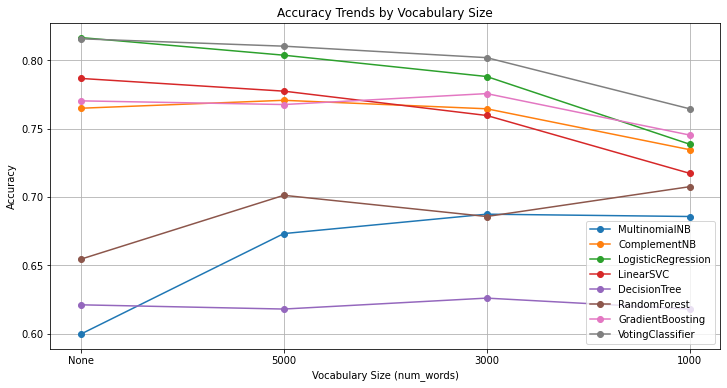

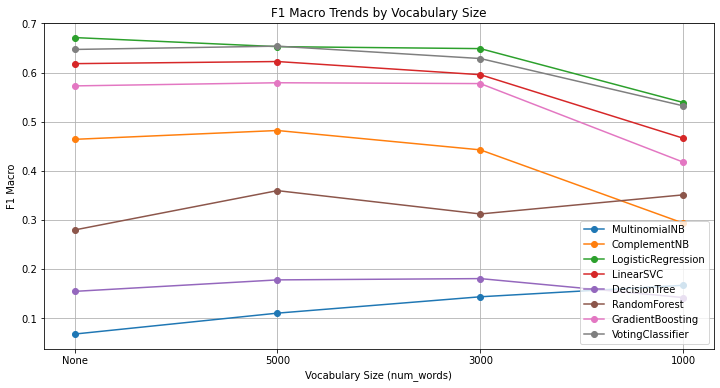

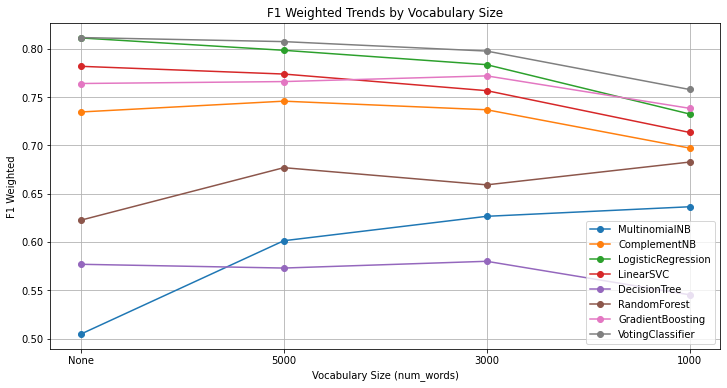

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# Data: Accuracy, F1 Macro, and F1 Weighted scores for different vocabulary sizes (num_words)
data = {
    "Model": [
        "MultinomialNB",
        "ComplementNB",
        "LogisticRegression",
        "LinearSVC",
        "DecisionTree",
        "RandomForest",
        "GradientBoosting",
        "VotingClassifier",
    ],
    "Accuracy_None": [
        0.5997, 0.7649, 0.8166, 0.7867, 0.6211, 0.6545, 0.7703, 0.8157
    ],
    "F1_Macro_None": [
        0.0676, 0.4640, 0.6712, 0.6181, 0.1545, 0.2795, 0.5728, 0.6470
    ],
    "F1_Weighted_None": [
        0.5046, 0.7347, 0.8114, 0.7820, 0.5769, 0.6226, 0.7642, 0.8118
    ],
    "Accuracy_5000": [
        0.6732, 0.7707, 0.8037, 0.7774, 0.6180, 0.7012, 0.7676, 0.8103
    ],
    "F1_Macro_5000": [
        0.1102, 0.4820, 0.6527, 0.6224, 0.1779, 0.3596, 0.5792, 0.6537
    ],
    "F1_Weighted_5000": [
        0.6013, 0.7459, 0.7986, 0.7740, 0.5730, 0.6770, 0.7662, 0.8076
    ],
    "Accuracy_3000": [
        0.6874, 0.7645, 0.7881, 0.7596, 0.6260, 0.6857, 0.7756, 0.8019
    ],
    "F1_Macro_3000": [
        0.1435, 0.4426, 0.6487, 0.5956, 0.1805, 0.3121, 0.5775, 0.6285
    ],
    "F1_Weighted_3000": [
        0.6266, 0.7370, 0.7837, 0.7568, 0.5800, 0.6592, 0.7721, 0.7978
    ],
    "Accuracy_1000": [
        0.6857, 0.7346, 0.7386, 0.7173, 0.6180, 0.7075, 0.7453, 0.7645
    ],
    "F1_Macro_1000": [
        0.1669, 0.2934, 0.5390, 0.4663, 0.1419, 0.3510, 0.4176, 0.5322
    ],
    "F1_Weighted_1000": [
        0.6365, 0.6973, 0.7326, 0.7135, 0.5453, 0.6828, 0.7385, 0.7580
    ],
}

# Convert data to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Plot Accuracy trends
plt.figure(figsize=(12, 6))
for model in df["Model"]:
    plt.plot(
        ["None", "5000", "3000", "1000"],
        df[df["Model"] == model][["Accuracy_None", "Accuracy_5000", "Accuracy_3000", "Accuracy_1000"]].values.flatten(),
        marker="o",
        label=model,
    )
plt.title("Accuracy Trends by Vocabulary Size")
plt.xlabel("Vocabulary Size (num_words)")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plot F1 Macro trends
plt.figure(figsize=(12, 6))
for model in df["Model"]:
    plt.plot(
        ["None", "5000", "3000", "1000"],
        df[df["Model"] == model][["F1_Macro_None", "F1_Macro_5000", "F1_Macro_3000", "F1_Macro_1000"]].values.flatten(),
        marker="o",
        label=model,
    )
plt.title("F1 Macro Trends by Vocabulary Size")
plt.xlabel("Vocabulary Size (num_words)")
plt.ylabel("F1 Macro")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plot F1 Weighted trends
plt.figure(figsize=(12, 6))
for model in df["Model"]:
    plt.plot(
        ["None", "5000", "3000", "1000"],
        df[df["Model"] == model][["F1_Weighted_None", "F1_Weighted_5000", "F1_Weighted_3000", "F1_Weighted_1000"]].values.flatten(),
        marker="o",
        label=model,
    )
plt.title("F1 Weighted Trends by Vocabulary Size")
plt.xlabel("Vocabulary Size (num_words)")
plt.ylabel("F1 Weighted")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

1. num_words를 none, 5000, 3000, 1000에 대해 8가지 머신러닝을 적용한 결과
- accuracy기준으로 로지스틱회귀모델이 num_words가 none일때 81.66%를 기록하여 최고 성능을 기록했다.

2. 단어장 크기에 따른 머신러닝 모델의 성능 변화 추이

- 2.1 Multinomial Naive Bayes
- 단어장의 크기를 제한하면 성능이 형상되는 것을 보인다. 이 알고리즘은 단어가 독립됨을 가정하는데 단어장이 크면 노이즈가 포함되어 모델이 덜 중요한 단어까지 학습하게 된다. 단어장의 크기가 1000인 경우에는 accuracy가 조금 하락하여 주요 단어까지 제거되어 정보가 손실됬음을 추측할 수 있다.

- 2.2 Complement Naive Bayes
- None보다 5000일 때 소폭 성능이 향상되나 3000, 1000으로 내려갈 수록 성능이 하락한다.
- ComplementNB는 MultinomialNB의 개선된 모델로, 데이터 불균형에 강하며 소수 클래스에서 더 좋은 성능을 보인다.
- 단어장의 크기가 5000 정도가 적절한 것으로 보인다.

- 2.3 Logistic Regression
- Accuracy는 모든 단어 사용 시 81.66%로 가장 높고, 단어 수가 줄어들수록 성능이 점진적으로 하락하여 num_words=1000에서 73.86%를 기록했고 f1 score도 비슷한 추세를 보인다.
- 로지스틱회귀는 고차원 데이터를 선호하며, 단어 벡터의 각 특징에 가중치를 할당하여 학습한다.

- 2.4 LinearSVC
- Accuracy는 num_words=None에서 78.67%, num_words=1000에서 71.73%로 감소했고 F1 Score도 비슷한 하락 추세를 보인다.
- LinearSVC는 선형 결정 경계를 사용하며, 단어 간의 관계를 암묵적으로 학습한다. 고차원 데이터를 선호하며, 단어 수가 많아질수록 더 정교한 결정 경계를 설정할 수 있다.

- 2.5 Decision Tree
- 기본적으로 트리 계열의 모델들은 고차원이고 희소한 데이터에 대해서는 성능이 나오지 않는다는 특징이 있다. 따라서 성능이 다른 모델에 비해 좋지 않음을 알 수 있다.
- Decision Tree는 각 특징(단어)을 기준으로 데이터를 분리하며, 과적합에 취약하다.단어 수가 많아질수록 복잡한 규칙을 학습해 과적합이 발생할 가능성이 큰 것으로 보인다.

- 2.6 Random Forest
- None일때 가장 성능이 좋지않고 5000일때 성능향상, 3000일때 성능하락, 1000일때 성능 향상을 보인다.
- 디시전트리보다는 성능이 좋았고 과적합에 강함을 보여준다. 

- 2.7 Gradient Boosting
- 단어장의 개수가 3000이 될때 까지 성능이 향상되다 1000개가 되자 성능이 하락한다.
- Gradient Boosting은 순차적으로 약한 학습기를 학습하며, 중요한 특징(단어)에 가중치를 더 많이 부여한다. 불필요한 단어가 포함되더라도 중요한 단어를 선택적으로 학습하여 성능이 안정적이다. 3000개에서 1000개 사이의 단어가 중요 단어라고 생각된다.

- 2.8 Voting Classifier
- 보팅에 로지스틱회귀, 그래디언트 부스팅, CNB를 사용했다.
- accuracy성능은 모든 단어장의 크기에 대해 가장 좋은 성능을 보였고(num_words=None제외 로지스틱회귀 단일 모델이랑 거의 비슷)
- f1-score도 비교적 좋은 성능을 보였다.
- 단어장의 개수가 작아질수록 성능이 하락하였는데 Voting Classifier는 Logistic Regression과 Gradient Boosting의 조합으로 성능을 결정하고
- 단어장이 제한될 경우 Logistic Regression 성능 하락이 주요 요인으로 작용됬음을 추측 할 수 있다. 

- 단어장의 크기가 작아질수록 성능이 하락하는 모델은
- Logistic Regression, LinearSVC, + LR, GB, CNB로 구성된 위의 voting

- 성능이 향상되기도 하는 모델
- MNB, RF, GB, CNB
- DT는 성능이 너무 안좋음
- 그래디언트 부스팅은 학습시간이 많이 소요되기때문에 제외하고 MNB, CNB, RF에 대해 더 실험

In [89]:
# 단어 500개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=500, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

#test데이터도 변환해주세요!
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said <unk> net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> <unk> <unk> to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash <unk> per share this year should be 2 50 to three dlrs reuter 3
8982
2246
(8982, 482)
(8982, 482)


In [91]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

model = MultinomialNB()
model.fit(tfidfv, y_train)

print(MultinomialNB)
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
cb = ComplementNB()
cb.fit(tfidfv, y_train)
print(ComplementNB)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
print(RandomForestClassifier)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)

<class 'sklearn.naive_bayes.MultinomialNB'>
정확도: 0.6589492430988424
F1 Score (Macro Average): 0.13563374613873624
F1 Score (Weighted Average): 0.6054372717743651
-----------------------------------------------------------
<class 'sklearn.naive_bayes.ComplementNB'>
정확도: 0.707479964381122
F1 Score (Macro Average): 0.18225351672321088
F1 Score (Weighted Average): 0.6591076150109872
-----------------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
정확도: 0.6981300089047195
F1 Score (Macro Average): 0.33263923039835036
F1 Score (Weighted Average): 0.6728069991850729


In [92]:
# 단어 7000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=7000, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

#test데이터도 변환해주세요!
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
8982
2246
(8982, 6807)
(8982, 6807)


In [93]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

model = MultinomialNB()
model.fit(tfidfv, y_train)

print(MultinomialNB)
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
cb = ComplementNB()
cb.fit(tfidfv, y_train)
print(ComplementNB)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
print(RandomForestClassifier)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)

<class 'sklearn.naive_bayes.MultinomialNB'>
정확도: 0.6647373107747105
F1 Score (Macro Average): 0.10060228782882928
F1 Score (Weighted Average): 0.5868030333364741
-----------------------------------------------------------
<class 'sklearn.naive_bayes.ComplementNB'>
정확도: 0.7684772929652716
F1 Score (Macro Average): 0.4879321803491842
F1 Score (Weighted Average): 0.7440417746088323
-----------------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
정확도: 0.6736420302760463
F1 Score (Macro Average): 0.30133443066741716
F1 Score (Weighted Average): 0.6449927903814345


In [94]:
# 단어 10,000개 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

#test데이터도 변환해주세요!
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
8982
2246
(8982, 9670)
(8982, 9670)


In [95]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

model = MultinomialNB()
model.fit(tfidfv, y_train)

print(MultinomialNB)
predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
cb = ComplementNB()
cb.fit(tfidfv, y_train)
print(ComplementNB)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)
print('-----------------------------------------------------------')
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
print(RandomForestClassifier)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
f1_macro = f1_score(y_test, predicted, average='macro')
print("F1 Score (Macro Average):", f1_macro)
f1_weighted = f1_score(y_test, predicted, average='weighted')
print("F1 Score (Weighted Average):", f1_weighted)

<class 'sklearn.naive_bayes.MultinomialNB'>
정확도: 0.6567230632235085
F1 Score (Macro Average): 0.09672807335440754
F1 Score (Weighted Average): 0.5764467518778252
-----------------------------------------------------------
<class 'sklearn.naive_bayes.ComplementNB'>
정확도: 0.7707034728406055
F1 Score (Macro Average): 0.47835757543524193
F1 Score (Weighted Average): 0.7456682614453047
-----------------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
정확도: 0.674087266251113
F1 Score (Macro Average): 0.30931816900485903
F1 Score (Weighted Average): 0.6429484177284822


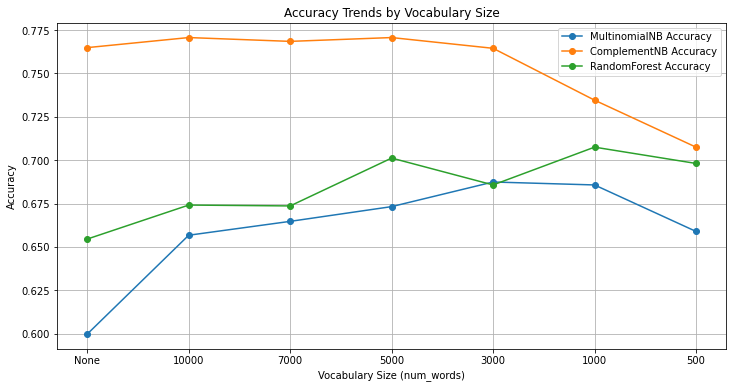

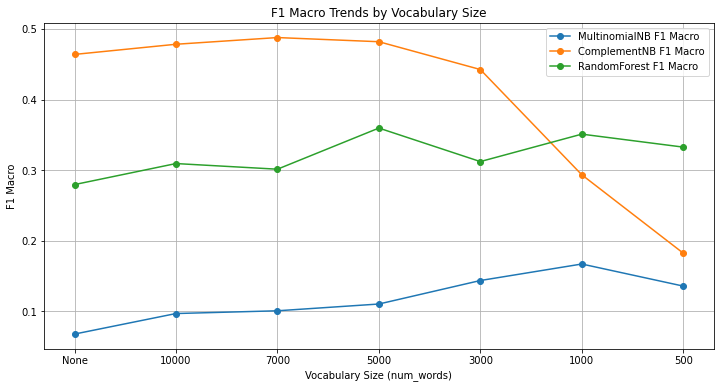

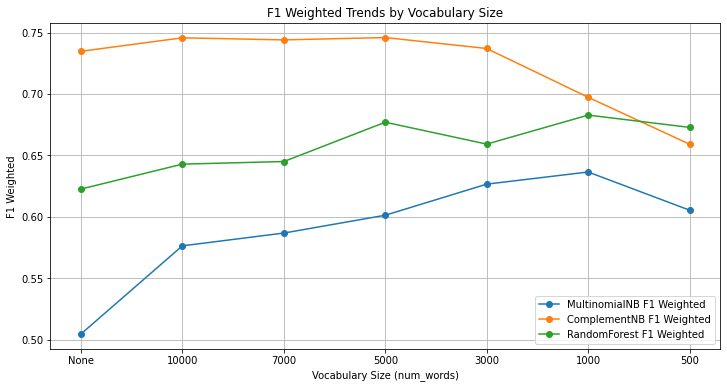

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for visualization
data = {
    "Vocabulary_Size": ["None", "10000", "7000", "5000", "3000", "1000", "500"],
    "MultinomialNB_Accuracy": [0.5997, 0.6567, 0.6647, 0.6732, 0.6874, 0.6857, 0.6589],
    "MultinomialNB_F1_Macro": [0.0676, 0.0967, 0.1006, 0.1102, 0.1435, 0.1669, 0.1356],
    "MultinomialNB_F1_Weighted": [0.5046, 0.5764, 0.5868, 0.6013, 0.6266, 0.6365, 0.6054],
    "ComplementNB_Accuracy": [0.7649, 0.7707, 0.7685, 0.7707, 0.7645, 0.7346, 0.7075],
    "ComplementNB_F1_Macro": [0.4640, 0.4784, 0.4879, 0.4820, 0.4426, 0.2934, 0.1823],
    "ComplementNB_F1_Weighted": [0.7347, 0.7457, 0.7440, 0.7459, 0.7370, 0.6973, 0.6591],
    "RandomForest_Accuracy": [0.6545, 0.6741, 0.6736, 0.7012, 0.6857, 0.7075, 0.6981],
    "RandomForest_F1_Macro": [0.2795, 0.3093, 0.3013, 0.3596, 0.3121, 0.3510, 0.3326],
    "RandomForest_F1_Weighted": [0.6226, 0.6429, 0.6450, 0.6770, 0.6592, 0.6828, 0.6728],
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plot Accuracy trends
plt.figure(figsize=(12, 6))
plt.plot(df["Vocabulary_Size"], df["MultinomialNB_Accuracy"], marker="o", label="MultinomialNB Accuracy")
plt.plot(df["Vocabulary_Size"], df["ComplementNB_Accuracy"], marker="o", label="ComplementNB Accuracy")
plt.plot(df["Vocabulary_Size"], df["RandomForest_Accuracy"], marker="o", label="RandomForest Accuracy")
plt.title("Accuracy Trends by Vocabulary Size")
plt.xlabel("Vocabulary Size (num_words)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot F1 Macro trends
plt.figure(figsize=(12, 6))
plt.plot(df["Vocabulary_Size"], df["MultinomialNB_F1_Macro"], marker="o", label="MultinomialNB F1 Macro")
plt.plot(df["Vocabulary_Size"], df["ComplementNB_F1_Macro"], marker="o", label="ComplementNB F1 Macro")
plt.plot(df["Vocabulary_Size"], df["RandomForest_F1_Macro"], marker="o", label="RandomForest F1 Macro")
plt.title("F1 Macro Trends by Vocabulary Size")
plt.xlabel("Vocabulary Size (num_words)")
plt.ylabel("F1 Macro")
plt.legend()
plt.grid(True)
plt.show()

# Plot F1 Weighted trends
plt.figure(figsize=(12, 6))
plt.plot(df["Vocabulary_Size"], df["MultinomialNB_F1_Weighted"], marker="o", label="MultinomialNB F1 Weighted")
plt.plot(df["Vocabulary_Size"], df["ComplementNB_F1_Weighted"], marker="o", label="ComplementNB F1 Weighted")
plt.plot(df["Vocabulary_Size"], df["RandomForest_F1_Weighted"], marker="o", label="RandomForest F1 Weighted")
plt.title("F1 Weighted Trends by Vocabulary Size")
plt.xlabel("Vocabulary Size (num_words)")
plt.ylabel("F1 Weighted")
plt.legend()
plt.grid(True)
plt.show()

- CNB는 원래 레이블이 불균형 할때 강건한 모델로 단어장의 크기에 따라 성능의 변화가 거의 없다가 
- 3000개 이하로 떨어질 때 부터 중요한 단어를 학습하지 못하게 되어 성능이 급격히 하락한다.
- RF는 단어장의 크기에 따라 성능이 향상, 하락을 반복한다.
- MNB는 CNB에 비해 이 데이터셋에 대해 성능이 일반적으로 좋지 않다. 단어장의 크기가 1000개로 줄어 들 떄까지 성능이 향상되다
- 500개로 감소하게 되니 성능이 하락했다.